## AccelerateAI - Global Bootcamp

#### Tree Based Models

In this notebook we train ensemble models to predict handwritten digits.

In [27]:
#Load required libraries
import pandas as pd

import matplotlib.pyplot as plt  #Graphics
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

In [28]:
#Read the data
digits_df = pd.read_csv("DT_digit_Classification_MNIST.csv")
digits_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#Show a matrix as an image
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)                            

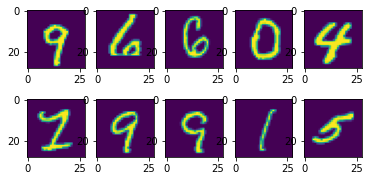

In [30]:
# How does the digits look like?
test = digits_df.sample(10)
test.drop(columns=['label'], inplace=True)

#Plot the pixl
plt.figure(figsize=(6,3))
for i in range(10):
    plt.subplot(2,5, i+1)
    print_image(i, test)

In [31]:
#Split the dataset

df_x = digits_df.drop(columns=['label'])
df_y = digits_df['label']

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print("Train Data:", X_train.shape)
print("Test Data:", X_test.shape)

Train Data: (33600, 784)
Test Data: (8400, 784)


In [32]:
# Check the distribution of digits in train and test
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(1    0.110804
 7    0.104226
 3    0.103810
 9    0.100476
 0    0.098780
 2    0.098720
 6    0.098095
 8    0.098065
 4    0.096577
 5    0.090446
 Name: label, dtype: float64,
 1    0.114405
 7    0.107024
 3    0.102738
 2    0.102381
 6    0.100119
 4    0.098452
 0    0.096786
 9    0.096667
 8    0.091429
 5    0.090000
 Name: label, dtype: float64)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

names = ["Decision Tree", 
         "Random Forest", 
         "AdaBoost" 
        ]

classifiers = [
    DecisionTreeClassifier(max_depth=25),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=50)
]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    trainscore = clf.score(X_train, y_train)
    testscore = clf.score(X_test, y_test)
    print(name," score:",trainscore.round(3), testscore.round(3))

Decision Tree  score: 0.998 0.858
Random Forest  score: 1.0 0.965
AdaBoost  score: 0.74 0.738


* Decision Tree overfits the data. 
* Random forest is doing a reasonable job, with just 100 trees.
* Adaboost is struggling with 50 trees, but is not overfitting

In [34]:
# Check for how well random forest classifies each digit.
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)

pred = clf.predict(X_test)

print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Confusion Report
[[792   0   0   1   2   3   7   0   8   0]
 [  0 948   4   3   1   2   1   0   2   0]
 [  4   1 836   4   2   0   3   5   5   0]
 [  2   0  17 815   0   7   2   7   8   5]
 [  2   2   0   0 800   0   4   1   2  16]
 [  3   2   1  10   0 724   7   2   5   2]
 [  3   0   0   0   2   6 829   0   1   0]
 [  1   2  11   1   6   0   0 863   3  12]
 [  2   4   1   7   3   9   5   1 732   4]
 [  9   2   3  11  12   3   0  10   5 757]]


**Random forest seems to be doing quiet a good job at classifying the digits, using just pixel values!!**

Let's check the one's that has been predicted incorrectly.

In [35]:
X_test["actual"] = y_test
X_test["pred"] = pred

In [36]:
incorrect_df = X_test.query('actual==7 & pred==2')
incorrect_df.shape

(11, 786)

C:\Users\sachi\AppData\Local\Temp\ipykernel_6240\3871785054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_df.drop(columns=['actual', 'pred'], inplace=True)


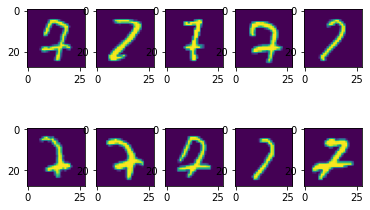

In [37]:
#Plot the incorrect ones
incorrect_df.drop(columns=['actual', 'pred'], inplace=True)
for i in range(10):
    plt.subplot(2,5, i+1)
    print_image(i, incorrect_df)

***